In [1]:
import numpy as np
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/Users/liuyue/anaconda3/envs/py36/lib/python3.6/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/liuyue/anaconda3/envs/py36/lib/python3.6/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
train_data.ndim

1

In [4]:
train_data.shape

(25000,)

In [5]:
# train_data是numpy.darray类型，但里边的元素是list类型，显示的shape规格为1维向量
print(type(train_data))
print(type(train_data[0]))

<class 'numpy.ndarray'>
<class 'list'>


In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
x_train = vectorize_sequences(train_data)

In [8]:
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')

In [11]:
y_test = np.asarray(test_labels).astype('float32')

In [12]:
y_train.ndim

1

In [13]:
y_train.shape

(25000,)

In [14]:
train_labels.shape

(25000,)

In [15]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [16]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [17]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 492us/step - loss: 0.5218 - accuracy: 0.7926 - val_loss: 0.3964 - val_accuracy: 0.8729
Epoch 2/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.3138 - accuracy: 0.9022 - val_loss: 0.3090 - val_accuracy: 0.8871
Epoch 3/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.2317 - accuracy: 0.9247 - val_loss: 0.2864 - val_accuracy: 0.8891
Epoch 4/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1832 - accuracy: 0.9415 - val_loss: 0.2896 - val_accuracy: 0.8845
Epoch 5/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1483 - accuracy: 0.9540 - val_loss: 0.2808 - val_accuracy: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.1241 - accuracy: 0.9617 - val_loss: 0.3032 - val_accuracy: 0.8804
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [23]:
history_dict = history.history

In [24]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

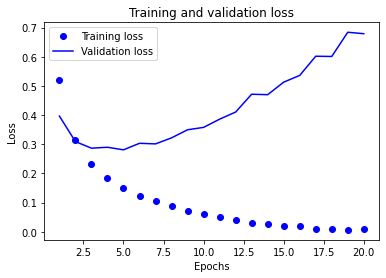

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

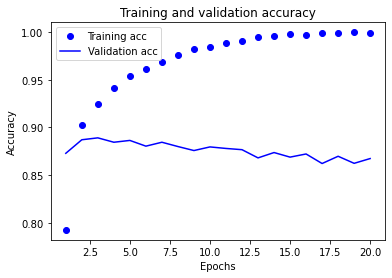

In [27]:
plt.clf()    
acc = history_dict['accuracy']  
val_acc = history_dict['val_accuracy'] 
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.show()